# follow-trend

    1. S&P 500 index closes above its 200 day moving average
    2. The stock closes above its upper band, buy
    
    1. S&P 500 index closes below its 200 day moving average
    2. The stock closes below its lower band, sell your long position.
    
    (multiple securities)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define symbols

In [4]:
# S&P All Sectors
symbols = ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
# Other Sectors
symbols += ['RSP', 'DIA', 'IWM', 'QQQ', 'DAX', 'EEM', 'TLT', 'GLD', 'XHB']

# Elite Stocks
symbols = ['ADP', 'BMY', 'BRK-B', 'BTI', 'BUD', 'CL', 'CLX', 'CMCSA', 'DIS', 'DOV']
symbols += ['GIS', 'HD', 'HRL', 'HSY', 'INTC', 'JNJ', 'K', 'KMB', 'KMI', 'KO']
symbols += ['LLY', 'LMT', 'MCD', 'MO', 'MRK', 'MSFT', 'NUE', 'PG', 'PM', 'RDS-B']
symbols += ['SO', 'T', 'UL', 'V', 'VZ', 'XOM']

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for symbol in symbols:
    print("{0}".format(symbol), end=" ")
    strategies[symbol] = strategy.Strategy(symbol, capital, start, end, use_adj=True,
                                           sma_period=200, percent_band=3.5, regime_filter=True)
    strategies[symbol].run()
    _, strategies[symbol].tlog, strategies[symbol].dbal = strategies[symbol].get_logs()
    strategies[symbol].stats = strategies[symbol].get_stats()

ADP BMY BRK-B BTI BUD CL CLX CMCSA DIS DOV GIS HD HRL HSY INTC JNJ K KMB KMI KO LLY LMT MCD MO MRK MSFT NUE PG PM RDS-B SO T UL V VZ XOM 

Summarize results

In [6]:
metrics = ('start',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
pd.set_option('display.max_columns', len(df.columns))
df

,ADP,BMY,BRK-B,BTI,BUD,CL,CLX,CMCSA,DIS,DOV,GIS,HD,HRL,HSY,INTC,JNJ,K,KMB,KMI,KO,LLY,LMT,MCD,MO,MRK,MSFT,NUE,PG,PM,RDS-B,SO,T,UL,V,VZ,XOM
start,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2010-04-16,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2011-11-25,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2008-12-29,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2008-12-31,2000-01-03,2000-01-03
annual_return_rate,4.13,2.26,3.36,8.80,-0.17,1.32,2.15,3.03,9.29,3.59,1.42,4.05,5.40,6.20,-0.82,1.20,-0.76,0.54,1.46,2.69,2.50,7.20,5.01,5.29,1.70,3.72,0.66,1.31,-0.74,1.01,2.06,0.10,1.43,11.74,-0.44,1.66
max_closed_out_drawdown,-32.57,-38.37,-35.56,-47.68,-33.05,-43.66,-42.35,-55.69,-31.42,-33.26,-24.77,-56.91,-30.77,-30.52,-66.71,-24.82,-42.16,-41.58,-22.14,-29.88,-60.19,-36.64,-25.65,-42.72,-50.86,-50.60,-62.70,-24.19,-47.11,-43.30,-37.37,-44.43,-37.32,-37.01,-42.12,-30.73
sharpe_ratio,0.36,0.23,0.36,0.63,0.07,0.16,0.23,0.25,0.64,0.29,0.19,0.32,0.45,0.56,0.05,0.18,-0.03,0.10,0.17,0.31,0.24,0.59,0.47,0.47,0.19,0.31,0.13,0.18,0.00,0.13,0.26,0.06,0.17,0.72,0.02,0.20
sortino_ratio,0.38,0.20,0.36,0.73,0.08,0.15,0.22,0.24,0.73,0.29,0.18,0.32,0.45,0.58,0.05,0.16,-0.03,0.09,0.18,0.29,0.20,0.58,0.45,0.45,0.19,0.28,0.13,0.18,0.00,0.13,0.24,0.06,0.16,0.74,0.01,0.18
monthly_std,3.71,4.31,3.18,4.25,4.25,3.00,3.23,4.73,4.51,4.92,2.94,4.40,3.83,3.64,5.95,2.70,2.60,3.00,3.95,3.03,4.62,3.95,3.39,4.11,3.80,4.41,6.11,2.80,3.72,4.17,3.03,3.20,3.35,5.13,3.44,3.52
pct_time_in_market,61.88,46.66,56.51,56.86,62.98,54.30,55.97,54.28,56.96,56.61,52.99,60.13,55.07,50.29,52.53,48.54,45.82,53.50,54.47,50.16,50.35,56.96,53.03,55.46,50.95,53.75,49.01,55.31,57.70,53.62,51.67,47.92,51.22,74.84,48.11,48.54
total_num_trades,50,46,47,70,25,53,62,44,52,49,59,49,64,54,66,59,54,55,16,60,55,66,55,61,52,52,50,48,36,56,65,49,49,35,52,54
pct_profitable_trades,44.00,30.43,42.55,51.43,32.00,41.51,48.39,40.91,46.15,28.57,44.07,34.69,43.75,48.15,31.82,33.90,38.89,34.55,62.50,43.33,40.00,45.45,38.18,37.70,38.46,34.62,26.00,37.50,33.33,41.07,43.08,40.82,36.73,37.14,38.46,48.15
avg_points,1.39,0.36,1.09,0.05,-0.01,0.11,0.68,0.25,1.59,0.50,0.16,1.97,0.14,1.65,-0.25,0.22,-0.23,0.10,0.22,0.12,0.85,3.21,0.44,0.06,0.33,1.38,-0.18,0.43,-0.52,0.05,0.09,-0.05,0.05,2.20,-0.12,0.16


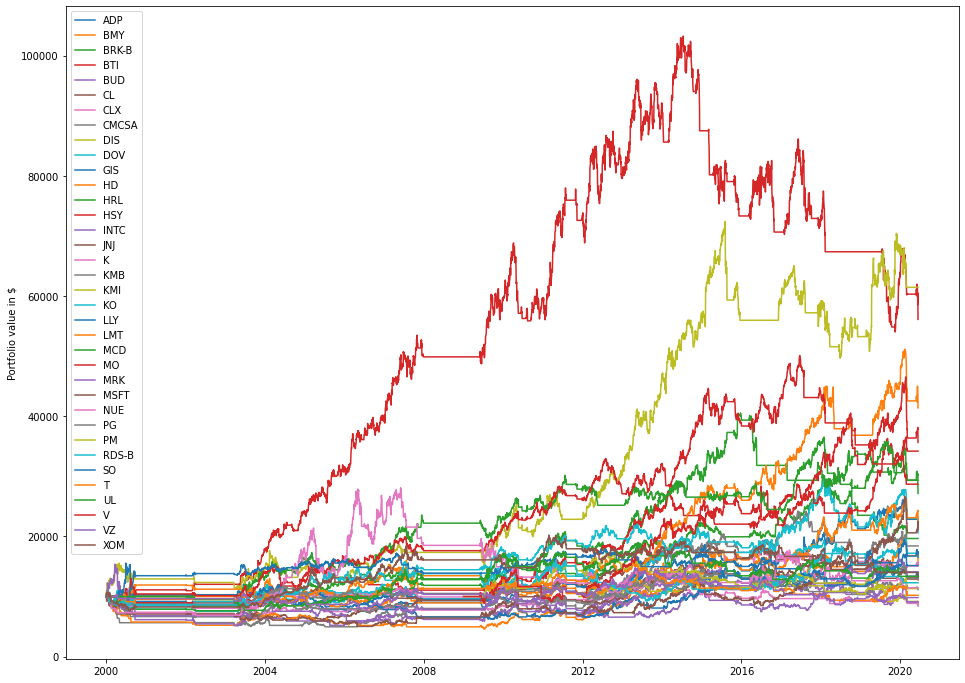

In [7]:
pf.plot_equity_curves(strategies)